# Data Scientist Net Income Life

# Importing

In [334]:
import pandas as pd
import os
import lxml
from getpass import getpass
import requests as r
import json as json

from bs4 import BeautifulSoup as bs
import csv
import urllib.request
import numpy as np
import googlemaps
import geocoder
import seaborn as sns
import matplotlib.pyplot as plt


# City Information

In [335]:
# https://worldpopulationreview.com/us-cities
# https://alanhylands.com/how-to-web-scrape-wikipedia-python-urllib-beautiful-soup-pandas/
wpr = pd.read_html('https://worldpopulationreview.com/us-cities')

In [336]:
wpr_rev = wpr[0]
wpr_rev = pd.DataFrame(wpr_rev)
wpr_rev

,Rank,Name,State,2021 Pop,2010 Census,Change,Density (mi²),Area (mi²)
0,1,New York City,New York,8230290,8190210,NaN,4083,300
1,2,Los Angeles,California,3983540,3795510,NaN,1266,469
2,3,Chicago,Illinois,2679080,2697480,NaN,1756,227
3,4,Houston,Texas,2323660,2100280,NaN,541,640
4,5,Phoenix,Arizona,1733630,1449040,NaN,499,518
...,...,...,...,...,...,...,...,...
195,196,Miramar,Florida,142445,122300,NaN,736,29
196,197,Round Rock,Texas,142418,100772,NaN,586,36
197,198,Metairie,Louisiana,142135,138481,NaN,911,23
198,199,Olathe,Kansas,142119,126269,NaN,344,62


In [337]:
wpr_rev = wpr_rev.drop(['Change'], axis=1)

In [338]:
wpr_rev

,Rank,Name,State,2021 Pop,2010 Census,Density (mi²),Area (mi²)
0,1,New York City,New York,8230290,8190210,4083,300
1,2,Los Angeles,California,3983540,3795510,1266,469
2,3,Chicago,Illinois,2679080,2697480,1756,227
3,4,Houston,Texas,2323660,2100280,541,640
4,5,Phoenix,Arizona,1733630,1449040,499,518
...,...,...,...,...,...,...,...
195,196,Miramar,Florida,142445,122300,736,29
196,197,Round Rock,Texas,142418,100772,586,36
197,198,Metairie,Louisiana,142135,138481,911,23
198,199,Olathe,Kansas,142119,126269,344,62


In [339]:
# change = ( (df['2021 Pop'] / df['2010 Census']) - 1 )
wpr_rev.dtypes

Rank              int64
Name             object
State            object
2021 Pop          int64
2010 Census       int64
Density (mi²)     int64
Area (mi²)        int64
dtype: object

In [340]:
type(wpr_rev)

pandas.core.frame.DataFrame

**Need to add the State abbreviations for later use**

In [341]:
abbrev = pd.read_html('https://www.ssa.gov/international/coc-docs/states.html')
abbrev = abbrev[0]

abbrev = pd.DataFrame(abbrev)
abbrev = abbrev.rename(columns={0: "State", 1: "Abbrev"})
abbrev['State'] = abbrev['State'].str.title()

In [342]:
wpr_rev = pd.merge(wpr_rev, abbrev, how="left", on='State')
wpr_rev.columns = [ 'Rank', 'Name', 'State', '2021 Pop', '2010 Census','Density (mi²)', 'Area (mi²)', 'State.Ab' ]
wpr_rev.head()


,Rank,Name,State,2021 Pop,2010 Census,Density (mi²),Area (mi²),State.Ab
0,1,New York City,New York,8230290,8190210,4083,300,NY
1,2,Los Angeles,California,3983540,3795510,1266,469,CA
2,3,Chicago,Illinois,2679080,2697480,1756,227,IL
3,4,Houston,Texas,2323660,2100280,541,640,TX
4,5,Phoenix,Arizona,1733630,1449040,499,518,AZ


In [343]:
wpr_rev['Name'][0] = 'New York'

<ipython-input-343-fd17b7bcc86a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wpr_rev['Name'][0] = 'New York'


In [344]:
wpr_rev

,Rank,Name,State,2021 Pop,2010 Census,Density (mi²),Area (mi²),State.Ab
0,1,New York,New York,8230290,8190210,4083,300,NY
1,2,Los Angeles,California,3983540,3795510,1266,469,CA
2,3,Chicago,Illinois,2679080,2697480,1756,227,IL
3,4,Houston,Texas,2323660,2100280,541,640,TX
4,5,Phoenix,Arizona,1733630,1449040,499,518,AZ
...,...,...,...,...,...,...,...,...
195,196,Miramar,Florida,142445,122300,736,29,FL
196,197,Round Rock,Texas,142418,100772,586,36,TX
197,198,Metairie,Louisiana,142135,138481,911,23,LA
198,199,Olathe,Kansas,142119,126269,344,62,KS


In [345]:
wpr_rev['Name'][0]

'New York'

In [346]:
wpr_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           200 non-null    int64 
 1   Name           200 non-null    object
 2   State          200 non-null    object
 3   2021 Pop       200 non-null    int64 
 4   2010 Census    200 non-null    int64 
 5   Density (mi²)  200 non-null    int64 
 6   Area (mi²)     200 non-null    int64 
 7   State.Ab       199 non-null    object
dtypes: int64(5), object(3)
memory usage: 24.1+ KB


In [347]:
# https://stackoverflow.com/questions/44869327/find-index-of-all-rows-with-null-values-in-a-particular-column-in-pandas-datafra

wpr_rev[wpr_rev['State.Ab'].isnull()].index.tolist()

[19]

In [348]:
wpr_rev['State'][19]

'District of Columbia'

In [349]:
wpr_rev['State.Ab'][19] = 'DC'

<ipython-input-349-425f5ddeb2dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wpr_rev['State.Ab'][19] = 'DC'


In [350]:
wpr_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           200 non-null    int64 
 1   Name           200 non-null    object
 2   State          200 non-null    object
 3   2021 Pop       200 non-null    int64 
 4   2010 Census    200 non-null    int64 
 5   Density (mi²)  200 non-null    int64 
 6   Area (mi²)     200 non-null    int64 
 7   State.Ab       200 non-null    object
dtypes: int64(5), object(3)
memory usage: 24.1+ KB


**Adding Lat / Long's here**

In [351]:
# https://www.youtube.com/watch?v=tKy-IHAxt4s

**Pulling the Latitude**

In [352]:
# key1 = tbFrT08QqAH9H5JOJVgopluGj6GRNygV
# key2 = tkXeQ5Z2NNclVMxVR4aQKlApEHNlVLMw

In [353]:
latitude = []
i = 0
y = 0
for i in range(len(wpr_rev)):
    name = wpr_rev['Name'][i]
    state = wpr_rev['State.Ab'][y]
    address = ( name + ' ' + state )
    i += 1
    y += 1
    
    parameters = {
    "key" : "tkXeQ5Z2NNclVMxVR4aQKlApEHNlVLMw",
    "location" : address }
    
    response = r.get("http://www.mapquestapi.com/geocoding/v1/address", params = parameters)
    data = json.loads(response.text)['results']
    
    lat = data[0]['locations'][0]['latLng']['lat']
    lng = data[0]['locations'][0]['latLng']['lng']

    latitude.append(lat)

latitude = pd.DataFrame(latitude)

In [354]:
type(latitude)

pandas.core.frame.DataFrame

**Pulling the Longitude**

In [355]:
longitude = []
a = 0
b = 0
for i in range(len(wpr_rev)):
    name = wpr_rev['Name'][a]
    state = wpr_rev['State.Ab'][b]
    address = ( name + ' ' + state )
    a += 1
    b += 1
    
    parameters = {
    "key" : "tkXeQ5Z2NNclVMxVR4aQKlApEHNlVLMw",
    "location" : address }
    
    response = r.get("http://www.mapquestapi.com/geocoding/v1/address", params = parameters)
    data = json.loads(response.text)['results']
    
    lat = data[0]['locations'][0]['latLng']['lat']
    lng = data[0]['locations'][0]['latLng']['lng']

    longitude.append(lng)

longitude = pd.DataFrame(longitude)

**Pushing them into `wpr_rev`**

In [356]:
main = pd.concat([wpr_rev, latitude, longitude],
                    axis = 1, ignore_index=False)
main.columns = [ 'Rank', 'Name', 'State', '2021 Pop', '2010 Census','Density (mi²)', 'Area (mi²)', 'State.Ab', 'lat','lng' ]
main.head()

,Rank,Name,State,2021 Pop,2010 Census,Density (mi²),Area (mi²),State.Ab,lat,lng
0,1,New York,New York,8230290,8190210,4083,300,NY,40.713054,-74.007228
1,2,Los Angeles,California,3983540,3795510,1266,469,CA,34.052238,-118.243344
2,3,Chicago,Illinois,2679080,2697480,1756,227,IL,41.883229,-87.632398
3,4,Houston,Texas,2323660,2100280,541,640,TX,29.760803,-95.369506
4,5,Phoenix,Arizona,1733630,1449040,499,518,AZ,33.448204,-112.072585


In [357]:
# we will remove cities as they cause issues later; these are small cities near larger onesd
main = main[main.Name != 'Mesa']
main = main[main.Name != 'Virginia Beach']
main = main[main.lat != 32.735594 ] # We are removing Arlington Texas NOT Arlington Virginia...
main = main[main.Name != 'Aurora']
main = main.reset_index(drop=True)

In [358]:
cd

C:\Users\rands


In [359]:
main = pd.DataFrame(main)

main.to_excel('./Scraping/Tableau/Graduation_Statistics/wpr.xlsx')
print('Finished')

Finished


# City Economic Information

# Income Tax Brackets

# Federal Income Tax

In [360]:
# https://www.bankrate.com/finance/taxes/tax-brackets.aspx
fedtax = pd.read_html('https://www.bankrate.com/finance/taxes/tax-brackets.aspx')

In [361]:
fedtax = pd.DataFrame(fedtax[0])

In [362]:
fedtax

,Tax rate,Single,Head of household,Married filing jointly or qualifying widow,Married filing separately
0,10%,"$0 to $9,875","$0 to $14,100","$0 to $19,750","$0 to $9,875"
1,12%,"$9,876 to $40,125","$14,101 to $53,700","$19,751 to $80,250","$9,876 to $40,125"
2,22%,"$40,126 to $85,525","$53,701 to $85,500","$80,251 to $171,050","$40,126 to $85,525"
3,24%,"$85,526 to $163,300","$85,501 to $163,300","$171,051 to $326,600","$85,526 to $163,300"
4,32%,"$163,301 to $207,350","$163,301 to $207,350","$326,601 to $414,700","$163,301 to $207,350"
5,35%,"$207,351 to $518,400","$207,351 to $518,400","$414,701 to $622,050","$207,351 to $311,025"
6,37%,"$518,401 or more","$518,401 or more","$622,051 or more","$311,026 or more"
7,Source: IRS,Source: IRS,Source: IRS,Source: IRS,Source: IRS


In [363]:
# let's start by dealing with the columns we don't need
fedtax = fedtax.drop([ 'Head of household','Married filing jointly or qualifying widow', 'Married filing separately' ], axis=1)
fedtax = fedtax[:7]

In [364]:
fedtax

,Tax rate,Single
0,10%,"$0 to $9,875"
1,12%,"$9,876 to $40,125"
2,22%,"$40,126 to $85,525"
3,24%,"$85,526 to $163,300"
4,32%,"$163,301 to $207,350"
5,35%,"$207,351 to $518,400"
6,37%,"$518,401 or more"


In [365]:
# let's clean this up starting from left to right
# Tax Rate needs to be a decimal & that's all
fedtax[['Tax','%']] = fedtax['Tax rate'].str.split('%',expand=True)
fedtax = fedtax.drop(['%'], axis=1)
fedtax = fedtax.drop(['Tax rate'], axis=1)
fedtax['Tax'] = fedtax.Tax.astype(float)
tax_rate = fedtax['Tax'] / 100
fedtax['Fed_Rate'] = tax_rate
fedtax = fedtax.drop(['Tax'],axis=1)


In [366]:
# let's deal with the bottom which we dont need to work with in Tableau; we can work on the previous high
fedtax = fedtax[:6]

In [367]:
# let's split the single filer tax brackets into a low & mid range which we can work with in Tableau
fedtax[['Low', 'High']] = fedtax['Single'].str.split('to',expand=True)
fedtax[['Fed_Low']] = fedtax['Low'].str.replace('$','')
fedtax[['Fed_High']] = fedtax['High'].str.replace('$','')
fedtax = fedtax.drop(['Single','High','Low'],axis=1)
fedtax.replace(',','', regex=True, inplace=True)
fedtax['Fed_Low'] = fedtax.Fed_Low.astype(float)
fedtax['Fed_High'] = fedtax.Fed_High.astype(float)
fedtax.dtypes


Fed_Rate    float64
Fed_Low     float64
Fed_High    float64
dtype: object

In [368]:
fedtax

,Fed_Rate,Fed_Low,Fed_High
0,0.10,0.0,9875.0
1,0.12,9876.0,40125.0
2,0.22,40126.0,85525.0
3,0.24,85526.0,163300.0
4,0.32,163301.0,207350.0
5,0.35,207351.0,518400.0


In [369]:
mx = ( fedtax['Fed_High'] - fedtax['Fed_Low'] ) * fedtax['Fed_Rate']
fedtax['Tranche_Max'] = mx

In [370]:
fedtax

,Fed_Rate,Fed_Low,Fed_High,Tranche_Max
0,0.10,0.0,9875.0,987.50
1,0.12,9876.0,40125.0,3629.88
2,0.22,40126.0,85525.0,9987.78
3,0.24,85526.0,163300.0,18665.76
4,0.32,163301.0,207350.0,14095.68
5,0.35,207351.0,518400.0,108867.15


In [371]:
cd

C:\Users\rands


In [372]:
fed_tax = pd.DataFrame(fedtax)

fed_tax.to_excel('./Scraping/Tableau/Graduation_Statistics/fed_tax.xlsx')
print('Finished')

Finished


#  State Income Tax

In [373]:
# printing out the list of states required
states_list = wpr_rev.State.unique()
states_list

array(['New York', 'California', 'Illinois', 'Texas', 'Arizona',
       'Pennsylvania', 'Florida', 'Ohio', 'North Carolina', 'Indiana',
       'Washington', 'Colorado', 'District of Columbia', 'Massachusetts',
       'Tennessee', 'Oklahoma', 'Nevada', 'Michigan', 'Oregon',
       'Kentucky', 'Wisconsin', 'Maryland', 'New Mexico', 'Georgia',
       'Missouri', 'Nebraska', 'Virginia', 'Minnesota', 'Kansas',
       'Louisiana', 'Hawaii', 'Puerto Rico', 'Alaska', 'New Jersey',
       'Idaho', 'Iowa', 'Alabama', 'Utah', 'Arkansas', 'South Dakota',
       'Rhode Island', 'Mississippi', 'Connecticut'], dtype=object)

In [374]:
# configure initial dataframe with those at zero & build on that
states_tax_free = ['Alaska', 'Tennessee', 'Flordia', 'Texas', 'Washington','Nevada' ]
states_tax_free

['Alaska', 'Tennessee', 'Flordia', 'Texas', 'Washington', 'Nevada']

# Cost of Living

**Est. Monthly Costs without Rent**

In [375]:
# NEED TO RE-CONFIGURE TO THE 100 LARGEST CITIES IN THE COUNTRY or IF ERROR CLAUSE
cof2_list = []
def cost_living(cit):
    cit = str(cit)
    cit = cit.replace('Aurora','Aurora-CO')
    cit = cit.replace('Arlington','Arlington-TX')
    cit = cit.replace('St. Petersburg','Saint-Petersburg-FL')
    cit = cit.replace('Hialeah','Hialeah-FL-United-States')
    cit = cit.replace('Chula Vista','Chula-Vista-CA-United-States')
    cit = cit.replace('Gilbert','Gilbert-AZ-United-States')
    cit = cit.replace('Glendale','Glendale-AZ-United-States')
    cit = cit.replace('Garland','Garland-TX-United-States')
    cit = cit.replace('Paradise','Paradise-CA-United-States')
    cit = cit.replace('Hialeah','Hialeah-FL-United-States')

    cit = cit.replace('St.','Saint')
    cit = cit.replace(' ','-')

    # The if error statement should probably go here
    url = r.get(f'https://www.numbeo.com/cost-of-living/in/{cit}')
    # to here.
    
    soup = bs(url.content)
    cof = soup.find_all('span', attrs= {'class': 'emp_number'} )
    cof_rev = cof[1]
    cof_rev = str(cof_rev)
    cof_rev = cof_rev.replace('$','')
    cof_rev = cof_rev.replace(',','')
    
    cof_rev = cof_rev.replace('<span class="emp_number">','')
    cof_rev = cof_rev.replace('</span>','')
    cof_rev = float(cof_rev)

    cof2_list.append(cof_rev)


In [376]:
city = 0
for city in range(0,50):

    # The if error statement should probably go here
    cost_living(main['Name'][city])
    # to here.

    city = city + 1

In [377]:
cof2_list = pd.DataFrame(cof2_list)

**Same for Rent**

This is for one bedroom in the city centre

In [378]:
aprt_cc_list = []
def aprt_cost_cc(a_cit):
    a_cit = str(a_cit)
    a_cit = a_cit.replace('St. Petersburg','Saint-Petersburg-FL')
    a_cit = a_cit.replace('St.','Saint')
    a_cit = a_cit.replace('Hialeah','Hialeah-FL-United-States')
    a_cit = a_cit.replace('Chula Vista','Chula-Vista-CA-United-States')
    a_cit = a_cit.replace('Aurora','Aurora-CO')
    a_cit = a_cit.replace('Arlington','Arlington-TX')
    a_cit = a_cit.replace('Gilbert','Gilbert-AZ-United-States')
    a_cit = a_cit.replace('Glendale','Glendale-AZ-United-States')
    a_cit = a_cit.replace('Garland','Garland-TX-United-States')
    a_cit = a_cit.replace('Paradise','Paradise-CA-United-States')
    a_cit = a_cit.replace('Hialeah','Hialeah-FL-United-States')

    a_cit = a_cit.replace(' ','-')
    
    url = r.get(f'https://www.numbeo.com/cost-of-living/in/{a_cit}')
    soup_aprt = bs(url.content)
    cof_cc = soup_aprt.find_all('span', attrs= {'class': 'first_currency'} )
    cof_rev_cc = cof_cc[47]
    cof_rev_cc = str(cof_rev_cc)
    cof_rev_cc = cof_rev_cc.replace('$','')
    cof_rev_cc = cof_rev_cc.replace(',','')
    
    cof_rev_cc = cof_rev_cc.replace('<span class="first_currency">','')
    cof_rev_cc = cof_rev_cc.replace('</span>','')
    cof_rev_cc = float(cof_rev_cc)

    aprt_cc_list.append(cof_rev_cc)

In [379]:
h = 0
for h in range(0,50):
    aprt_cost_cc(main['Name'][h])
    
    h = h + 1

In [380]:
aprt_cc_list = pd.DataFrame(aprt_cc_list)

This is for one bedroom outside the city centre

In [381]:
aprt_oc_list = []
def aprt_cost_oc(b_cit):
    b_cit = str(b_cit)
    b_cit = b_cit.replace('St. Petersburg','Saint-Petersburg-FL')
    b_cit = b_cit.replace('St.','Saint')
    b_cit = b_cit.replace('Hialeah','Hialeah-FL-United-States')
    b_cit = b_cit.replace('Chula Vista','Chula-Vista-CA-United-States')
    b_cit = b_cit.replace('Aurora','Aurora-CO')
    b_cit = b_cit.replace('Arlington','Arlington-TX')
    b_cit = b_cit.replace('Gilbert','Gilbert-AZ-United-States')
    b_cit = b_cit.replace('Glendale','Glendale-AZ-United-States')
    b_cit = b_cit.replace('Garland','Garland-TX-United-States')
    b_cit = b_cit.replace('Paradise','Paradise-CA-United-States')
    b_cit = b_cit.replace('Hialeah','Hialeah-FL-United-States')
    b_cit = b_cit.replace(' ','-')
    
    url = r.get(f'https://www.numbeo.com/cost-of-living/in/{b_cit}')
    soup_oc_aprt = bs(url.content)
    cof_oc = soup_oc_aprt.find_all('span', attrs= {'class': 'first_currency'} )
    cof_rev_oc = cof_oc[48]
    cof_rev_oc = str(cof_rev_oc)
    cof_rev_oc = cof_rev_oc.replace('$','')
    cof_rev_oc = cof_rev_oc.replace(',','')
    
    cof_rev_oc = cof_rev_oc.replace('<span class="first_currency">','')
    cof_rev_oc = cof_rev_oc.replace('</span>','')
    cof_rev_oc = float(cof_rev_oc)

    aprt_oc_list.append(cof_rev_oc)

In [382]:
oc = 0
for oc in range(0,50):
    aprt_cost_oc(main['Name'][oc])
    
    oc = oc + 1

In [383]:
aprt_oc_list = pd.DataFrame(aprt_oc_list)

**Utilities**

In [384]:
# they say it's included in the cost of living #'s but I don't believe so; add it

In [385]:
util_list = []
def util_oc(u_cit):
    u_cit = str(u_cit)
    u_cit = u_cit.replace(' ','-')
    u_cit = u_cit.replace('St. Petersburg','Saint-Petersburg-FL')
    u_cit = u_cit.replace('St.','Saint')
    u_cit = u_cit.replace('Chula Vista','Chula-Vista-CA-United-States')
    u_cit = u_cit.replace('Aurora','Aurora-CO')
    u_cit = u_cit.replace('Arlington','Arlington-TX')
    u_cit = u_cit.replace('Gilbert','Gilbert-AZ-United-States')
    u_cit = u_cit.replace('Glendale','Glendale-AZ-United-States')
    u_cit = u_cit.replace('Garland','Garland-TX-United-States')
    u_cit = u_cit.replace('Paradise','Paradise-CA-United-States')
    u_cit = u_cit.replace('Hialeah','Hialeah-FL-United-States')
    u_cit = u_cit.replace('Hialeah','Hialeah-FL-United-States')
    
    url = r.get(f'https://www.numbeo.com/cost-of-living/in/{u_cit}')
    soup_util = bs(url.content)
    util_oc = soup_util.find_all('span', attrs= {'class': 'first_currency'} )
    cof_rev_util = util_oc[35]
    cof_rev_util = str(cof_rev_util)
    cof_rev_util = cof_rev_util.replace('$','')
    cof_rev_util = cof_rev_util.replace(',','')
    
    cof_rev_util = cof_rev_util.replace('<span class="first_currency">','')
    cof_rev_util = cof_rev_util.replace('</span>','')
    cof_rev_util = float(cof_rev_util)

    util_list.append(cof_rev_util)

In [386]:
util = 0
for util in range(0,50):
    util_oc(main['Name'][util])
    
    util = util + 1

# util_list

In [387]:
util_list = pd.DataFrame(util_list)

**Broadband Internet**

In [388]:
# they say it's included in the cost of living #'s but I don't believe so; add it

In [389]:
int_list = []
def broadband_c(int_c):
    int_c = str(int_c)
    int_c = int_c.replace(' ','-')
    int_c = int_c.replace('St. Petersburg','Saint-Petersburg-FL')
    int_c = int_c.replace('St.','Saint')
    int_c = int_c.replace('Chula Vista','Chula-Vista-CA-United-States')
    int_c = int_c.replace('Aurora','Aurora-CO')
    int_c = int_c.replace('Arlington','Arlington-TX')
    int_c = int_c.replace('Gilbert','Gilbert-AZ-United-States')
    int_c = int_c.replace('Glendale','Glendale-AZ-United-States')
    int_c = int_c.replace('Garland','Garland-TX-United-States')
    int_c = int_c.replace('Paradise','Paradise-CA-United-States')
    int_c = int_c.replace('Hialeah','Hialeah-FL-United-States')
    int_c = int_c.replace('Hialeah','Hialeah-FL-United-States')
    
    url = r.get(f'https://www.numbeo.com/cost-of-living/in/{int_c}')
    soup_int = bs(url.content)
    internet_c = soup_int.find_all('span', attrs= {'class': 'first_currency'} )
    internet_c_rev = internet_c[37]
    internet_c_rev = str(internet_c_rev)
    internet_c_rev = internet_c_rev.replace('$','')
    internet_c_rev = internet_c_rev.replace(',','')
    
    internet_c_rev = internet_c_rev.replace('<span class="first_currency">','')
    internet_c_rev = internet_c_rev.replace('</span>','')
    internet_c_rev = float(internet_c_rev)

    int_list.append(internet_c_rev)

In [390]:
interweb = 0
for interweb in range(0,50):
    broadband_c(main['Name'][interweb])
    
    interweb = interweb + 1

# int_list

In [391]:
int_list = pd.DataFrame(int_list)

**Cities need a car?**

All information required here will be "temporarily" handled by hand; will make the adjustments later.

In [392]:
# car_url = r.get('https://www.habitat.org/stories/top-10-cities-where-you-can-live-without-car-and-help-save-earth')

# car_soup = bs(car_url.content)
# print(car_soup.prettify())

# car_header = car_soup.find_all('div', attrs= {'class': 'story l-offset-2 l-padded l-padded--top'})
# car_check = car_header[1]
# car_check = str(car_check)
# car_check = check.replace('$','')
# car_check = check.replace('<span class="emp_number">','')
# car_check = check.replace('</span>','')
# car_check

In [393]:
# i = 0
# for i in range(0,200):
    # x = entry_income(main_ei['Name'][i],main_ei['State.Ab'][i])

    # wpr_rev_ei['Entry Salary'] = ent_income
    # i = i + 1

**Car Costs**

All information required here will be "temporarily" handled by hand; will make the adjustments later.

# Entry Level Income

In [394]:
# complete
ent_income = []
def entry_income(city,state):
    ent_sal = pd.read_html(f'https://www.indeed.com/career/data-scientist/salaries/{city}--{state}?from=top_sb')
    city = city.replace(' ','-')
    addition = ent_sal[0]['Per year'][0]
    addition = addition.replace('$','')
    addition = addition.replace(',','')
    addition = int(addition)
    
    ent_income.append(addition)
       

In [395]:
main_ei = main.copy()

In [396]:
main_ei['Name'] = main_ei['Name'].replace('-','~', regex=True)
main_ei['Name'] = main_ei['Name'].replace('St.','Saint', regex=True)
main_ei['Name'] = main_ei['Name'].replace(' ','-', regex=True)

In [397]:
i = 0
for i in range(0,50):
    x = entry_income(main_ei['Name'][i],main_ei['State.Ab'][i])

    # wpr_rev_ei['Entry Salary'] = ent_income
    i = i + 1


In [398]:
# ent_income

In [399]:
ent_income_rev = pd.Series(ent_income)

In [400]:
main_ei.head()

,Rank,Name,State,2021 Pop,2010 Census,Density (mi²),Area (mi²),State.Ab,lat,lng
0,1,New-York,New York,8230290,8190210,4083,300,NY,40.713054,-74.007228
1,2,Los-Angeles,California,3983540,3795510,1266,469,CA,34.052238,-118.243344
2,3,Chicago,Illinois,2679080,2697480,1756,227,IL,41.883229,-87.632398
3,4,Houston,Texas,2323660,2100280,541,640,TX,29.760803,-95.369506
4,5,Phoenix,Arizona,1733630,1449040,499,518,AZ,33.448204,-112.072585


In [401]:
main_ei = pd.concat([main_ei,ent_income_rev, cof2_list, aprt_cc_list,aprt_oc_list,util_list,int_list], axis = 1, ignore_index=False)

main_ei.columns = [ 'Rank', 'Name', 'State', '2021 Pop', '2010 Census', 'Density (mi²)',
       'Area (mi²)', 'State.Ab', 'lat', 'lng', 'Entry Income', 'Mnth Living_c', 'Aprt_CityCenter',
                  'Aprt_Suburb','Utilities', 'Internet' ]

main_ei.index.names = ["#"]


In [402]:
main_ei['Name'] = main_ei['Name'].replace('~','-', regex=True)
main_ei['Name'] = main_ei['Name'].replace('Saint','St.', regex=True)
main_ei['Name'] = main_ei['Name'].replace('-',' ', regex=True)

In [403]:
main_ei.head()

,Rank,Name,State,2021 Pop,2010 Census,Density (mi²),Area (mi²),State.Ab,lat,lng,Entry Income,Mnth Living_c,Aprt_CityCenter,Aprt_Suburb,Utilities,Internet
#,,,,,,,,,,,,,,,,
0,1,New York,New York,8230290,8190210,4083,300,NY,40.713054,-74.007228,117836.0,1347.59,3089.22,2007.93,160.75,64.89
1,2,Los Angeles,California,3983540,3795510,1266,469,CA,34.052238,-118.243344,107015.0,1065.45,2220.29,1718.83,162.18,69.41
2,3,Chicago,Illinois,2679080,2697480,1756,227,IL,41.883229,-87.632398,105522.0,1015.93,1888.96,1205.85,150.09,60.67
3,4,Houston,Texas,2323660,2100280,541,640,TX,29.760803,-95.369506,95344.0,820.53,1415.49,994.59,147.48,62.95
4,5,Phoenix,Arizona,1733630,1449040,499,518,AZ,33.448204,-112.072585,110327.0,878.27,1290.14,1008.57,171.88,78.10


**Until you figure out how to better manage the for loops on costs; we will need to cut the data into what you can pull. ( Top 50 )**

In [404]:
main_ei = main_ei.loc[0:49]

In [406]:
main_ei = pd.DataFrame(main_ei)

main_ei.to_excel('./Scraping/Tableau/Graduation_Statistics/wpr_inc.xlsx')
print('Finished')

Finished


**Brining back Fed Tax**

In [407]:
fedtax

,Fed_Rate,Fed_Low,Fed_High,Tranche_Max
0,0.10,0.0,9875.0,987.50
1,0.12,9876.0,40125.0,3629.88
2,0.22,40126.0,85525.0,9987.78
3,0.24,85526.0,163300.0,18665.76
4,0.32,163301.0,207350.0,14095.68
5,0.35,207351.0,518400.0,108867.15


In [408]:
fed_tax = []

for row in main_ei['Entry Income']:
    if row < fedtax['Fed_High'][2] : fed_tax.append(((main_ei['Entry Income']-fedtax['Fed_Low'][2])*fedtax['Fed_Rate'][2])
                                                   +(fedtax['Tranche_Max'][0]+fedtax['Tranche_Max'][1]) )
    elif fedtax['Fed_High'][2] < row < fedtax['Fed_High'][3] : fed_tax.append(((main_ei['Entry Income']-fedtax['Fed_Low'][3])*fedtax['Fed_Rate'][3])
                                                   +(fedtax['Tranche_Max'][0]+fedtax['Tranche_Max'][1]+fedtax['Tranche_Max'][2]))
    else:
        end 



In [409]:
fed_tax = pd.DataFrame(fed_tax)

In [410]:
fed_tax = fed_tax.T

In [411]:
fed_cols = fed_tax.columns

In [412]:
fed_tax.columns = ['Fed_tax', 'Entry Income', 'Entry Income', 'Entry Income',
       'Entry Income', 'Entry Income', 'Entry Income', 'Entry Income',
       'Entry Income', 'Entry Income', 'Entry Income', 'Entry Income',
       'Entry Income', 'Entry Income', 'Entry Income', 'Entry Income',
       'Entry Income', 'Entry Income', 'Entry Income', 'Entry Income',
       'Entry Income', 'Entry Income', 'Entry Income', 'Entry Income',
       'Entry Income', 'Entry Income', 'Entry Income', 'Entry Income',
       'Entry Income', 'Entry Income', 'Entry Income', 'Entry Income',
       'Entry Income', 'Entry Income', 'Entry Income', 'Entry Income',
       'Entry Income', 'Entry Income', 'Entry Income', 'Entry Income',
       'Entry Income', 'Entry Income', 'Entry Income', 'Entry Income',
       'Entry Income', 'Entry Income', 'Entry Income', 'Entry Income',
       'Entry Income', 'Entry Income']

In [413]:
fed_tax = fed_tax.drop(['Entry Income'],axis=1)

In [414]:
fed_tax.tail()

,Fed_tax
#,
45,21031.64
46,13250.60
47,14781.32
48,16178.12
49,15619.88


In [415]:
main_ei = pd.concat([main_ei, fed_tax], axis = 1, ignore_index=False)

main_ei.columns = [ 'Rank', 'Name', 'State', '2021 Pop', '2010 Census', 'Density (mi²)',
                   'Area (mi²)', 'State.Ab', 'lat', 'lng', 'Entry Income', 'Mnth Living_c',
                   'Aprt_CityCenter','Aprt_Suburb','Utilities', 'Internet','Fed Tax' ]

main_ei.index.names = ["#"]


In [416]:
main_ei.tail(3)

,Rank,Name,State,2021 Pop,2010 Census,Density (mi²),Area (mi²),State.Ab,lat,lng,Entry Income,Mnth Living_c,Aprt_CityCenter,Aprt_Suburb,Utilities,Internet,Fed Tax
#,,,,,,,,,,,,,,,,,
47,51,Bakersfield,California,389007,348987,387,150,CA,35.373405,-119.018911,86260.0,997.92,896.67,828.57,222.26,85.00,14781.32
48,53,New Orleans,Louisiana,388424,347772,342,169,LA,29.950621,-90.074948,92080.0,997.49,1455.51,1051.57,186.61,72.42,16178.12
49,54,Cleveland,Ohio,376599,395926,722,78,OH,41.505546,-81.691500,89754.0,1034.27,1341.35,966.18,203.83,58.51,15619.88


**Brining in State Tax**

Let's count how many these will be.

In [417]:
main_ei['State'].nunique()

29

Alright that's a lot; let's see how many are Zero.

In [418]:
states_tax_free = pd.DataFrame(states_tax_free)

In [419]:
len(states_tax_free)

6

In [420]:
states_tax_free = states_tax_free.rename(columns={0:'Tax Free States'})

In [421]:
states_tax_free

,Tax Free States
0,Alaska
1,Tennessee
2,Flordia
3,Texas
4,Washington
5,Nevada


In [422]:
# figure out a way to do this
# main_ei.columns.nunique([main_ei['State'] != state_tax[0]])

In [423]:
# one day I would like to build strcuture ( probably an SQL ) to determine this
# state_tax = []

In [424]:
# state_tax

In [425]:
# I unfortunately did this by hand
stat_tax = pd.read_excel('./SB #20 Data Storytelling/12.3.2 Craft a story/Grad Stats/state_tax.xlsx')

In [426]:
stat_tax.head()

,#,Rank,Name,State,Entry Income,State_Tax
0,0,1,New York,New York,117836,7034.000
1,1,2,Los Angeles,California,107015,4354.000
2,2,3,Chicago,Illinois,105522,5223.339
3,3,4,Houston,Texas,95344,0.000
4,4,5,Phoenix,Arizona,110327,3962.000


In [427]:
main_ei = pd.concat([main_ei, stat_tax['State_Tax']], axis = 1, ignore_index=False)

main_ei.columns = [ 'Rank', 'Name', 'State', '2021 Pop', '2010 Census', 'Density (mi²)',
                   'Area (mi²)', 'State.Ab', 'lat', 'lng', 'Entry Income', 'Mnth Living_c',
                   'Aprt_CityCenter','Aprt_Suburb','Utilities', 'Internet','Fed Tax','State Tax' ]

main_ei.index.names = ["#"]


Done. I hate that name so we will rename it.

In [428]:
df = main_ei

In [429]:
df = df.rename(columns={'Name': 'City'})

In [430]:
df.head(10)

,Rank,City,State,2021 Pop,2010 Census,Density (mi²),Area (mi²),State.Ab,lat,lng,Entry Income,Mnth Living_c,Aprt_CityCenter,Aprt_Suburb,Utilities,Internet,Fed Tax,State Tax
#,,,,,,,,,,,,,,,,,,
0,1,New York,New York,8230290,8190210,4083,300,NY,40.713054,-74.007228,117836.0,1347.59,3089.22,2007.93,160.75,64.89,22359.56,7034.0000
1,2,Los Angeles,California,3983540,3795510,1266,469,CA,34.052238,-118.243344,107015.0,1065.45,2220.29,1718.83,162.18,69.41,19762.52,4354.0000
2,3,Chicago,Illinois,2679080,2697480,1756,227,IL,41.883229,-87.632398,105522.0,1015.93,1888.96,1205.85,150.09,60.67,19404.20,5223.3390
3,4,Houston,Texas,2323660,2100280,541,640,TX,29.760803,-95.369506,95344.0,820.53,1415.49,994.59,147.48,62.95,16961.48,0.0000
4,5,Phoenix,Arizona,1733630,1449040,499,518,AZ,33.448204,-112.072585,110327.0,878.27,1290.14,1008.57,171.88,78.10,20557.40,3962.0000
5,6,Philadelphia,Pennsylvania,1585010,1528280,1759,134,PA,39.951061,-75.165620,86003.0,1011.11,1676.35,1112.05,150.32,61.48,14719.64,2640.2921
6,7,San Antonio,Texas,1581730,1332300,486,485,TX,29.425173,-98.494599,111152.0,830.01,1322.20,912.53,164.04,68.54,20755.40,0.0000
7,8,San Diego,California,1427720,1305910,653,326,CA,32.715760,-117.163817,109273.0,993.84,2217.94,1732.79,137.41,62.12,20304.44,7139.0000
8,9,Dallas,Texas,1347120,1200350,591,340,TX,32.777977,-96.796215,81389.0,899.85,1496.90,1082.13,165.04,60.62,13612.28,0.0000


In [431]:
region_list = []

for r in main_ei['State']:
    if r == 'Washington' : region_list.append('West')
    elif r == 'California' : region_list.append('West')
    elif r == 'Nevada' : region_list.append('West')
    elif r == 'Arizona' : region_list.append('West')
    elif r == 'New Mexico' : region_list.append('West')
    elif r == 'Colorado' : region_list.append('West')
    elif r == 'Oregon' : region_list.append('West')
        
    elif r == 'Minnesota'  :  region_list.append('Midwest')
    elif r == 'Iowa' : region_list.append('Midwest')
    elif r == 'Kansas' : region_list.append('Midwest')
    elif r == 'Missouri' : region_list.append('Midwest')
    elif r == 'Michigan' : region_list.append('Midwest')
    elif r == 'Ohio' : region_list.append('Midwest')
    elif r == 'Indiana' : region_list.append('Midwest')
    elif r == 'Wisconsin' : region_list.append('Midwest')
    elif r == 'Kentucky' : region_list.append('Midwest')
    elif r == 'Illinois' : region_list.append('Midwest')
    elif r == 'Oklahoma' : region_list.append('Midwest')
    elif r == 'Nebraska' : region_list.append('Midwest')
   
    
    elif r == 'Texas' : region_list.append('South')
    elif r == 'Arkansas'  :  region_list.append('South')
    elif r == 'Tennessee'  :  region_list.append('South')
    elif r == 'Louisiana'  :  region_list.append('South')
    elif r == 'Georgia'  :  region_list.append('South')
    elif r == 'North Carolina'  :  region_list.append('South')
    elif r == 'Florida'  :  region_list.append('South')

    else:
        region_list.append('North')


In [433]:
region_list = pd.DataFrame(region_list)

In [434]:
region_list.head()

,0
0,North
1,West
2,Midwest
3,South
4,West


In [439]:
df = df.rename(columns={0: 'Region'})

In [440]:
df.head(3)

,Rank,City,State,2021 Pop,2010 Census,Density (mi²),Area (mi²),State.Ab,lat,lng,Entry Income,Mnth Living_c,Aprt_CityCenter,Aprt_Suburb,Utilities,Internet,Fed Tax,State Tax,Region
0,1,New York,New York,8230290,8190210,4083,300,NY,40.713054,-74.007228,117836.0,1347.59,3089.22,2007.93,160.75,64.89,22359.56,7034.000,North
1,2,Los Angeles,California,3983540,3795510,1266,469,CA,34.052238,-118.243344,107015.0,1065.45,2220.29,1718.83,162.18,69.41,19762.52,4354.000,West
2,3,Chicago,Illinois,2679080,2697480,1756,227,IL,41.883229,-87.632398,105522.0,1015.93,1888.96,1205.85,150.09,60.67,19404.20,5223.339,Midwest


In [444]:
df['Net Income CC'] = ( df['Entry Income'] - ( ( df['Mnth Living_c'] + df['Aprt_CityCenter'] + df['Utilities'] + df['Internet'])*12) - df['Fed Tax'] - df['State Tax'] )

df['Net Income Sub'] = ( df['Entry Income'] - ( ( df['Mnth Living_c'] + df['Aprt_Suburb'] + df['Utilities'] + df['Internet'])*12) - df['Fed Tax'] - df['State Tax'] )


In [446]:
df = pd.DataFrame(df)

df.to_excel('./SB #20 Data Storytelling/12.3.2 Craft a story/Grad Stats/main.xlsx')
print('Finished')

Finished


# Let's draw some pictures

Before we do that we will create some new columns; let's start with `Net Income` based on living both in & out of the city center.

In [447]:
df.head(3)

,Rank,City,State,2021 Pop,2010 Census,Density (mi²),Area (mi²),State.Ab,lat,lng,...,Mnth Living_c,Aprt_CityCenter,Aprt_Suburb,Utilities,Internet,Fed Tax,State Tax,Region,Net Income CC,Net Income Sub
0,1,New York,New York,8230290,8190210,4083,300,NY,40.713054,-74.007228,...,1347.59,3089.22,2007.93,160.75,64.89,22359.56,7034.000,North,32493.040,45468.520
1,2,Los Angeles,California,3983540,3795510,1266,469,CA,34.052238,-118.243344,...,1065.45,2220.29,1718.83,162.18,69.41,19762.52,4354.000,West,40690.520,46708.040
2,3,Chicago,Illinois,2679080,2697480,1756,227,IL,41.883229,-87.632398,...,1015.93,1888.96,1205.85,150.09,60.67,19404.20,5223.339,Midwest,43506.661,51703.981


Let's take a look at where the highest paying jobs are located.

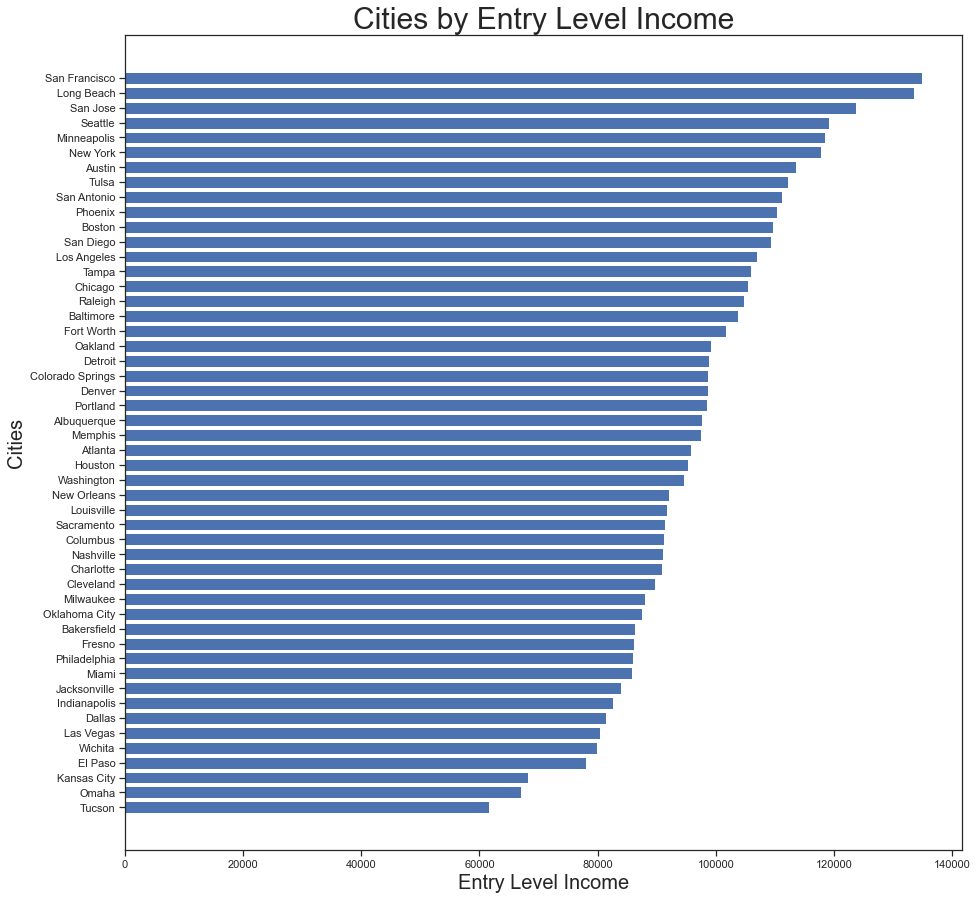

In [475]:
df.sort_values('Entry Income',inplace=True)

plt.figure(figsize=(15,15))
plt.barh(df['City'],df['Entry Income'])
plt.title('Cities by Entry Level Income', size=30)
plt.ylabel('Cities', size=20)
plt.xlabel('Entry Level Income', size=20)
plt.show()

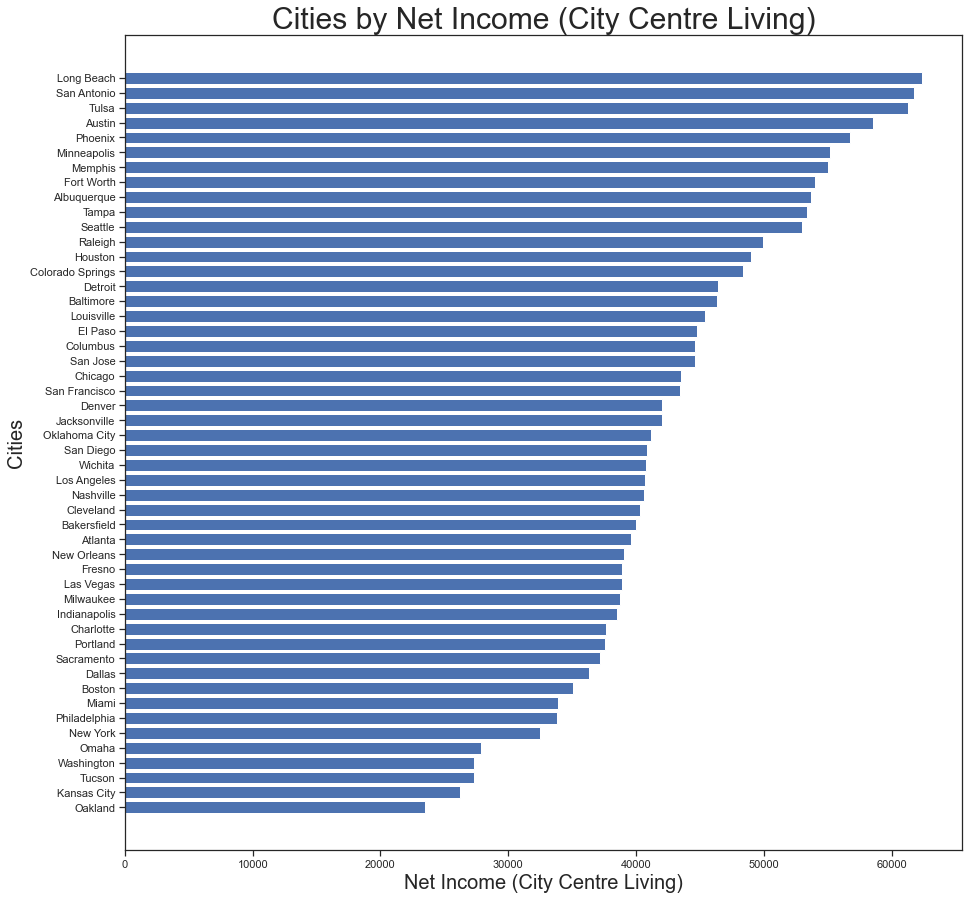

In [474]:
df.sort_values('Net Income CC',inplace=True)

plt.figure(figsize=(15,15))
plt.barh(df['City'],df['Net Income CC'])
plt.title('Cities by Net Income (City Centre Living)', size=30)
plt.ylabel('Cities', size=20)
plt.xlabel('Net Income (City Centre Living)', size=20)
plt.show()

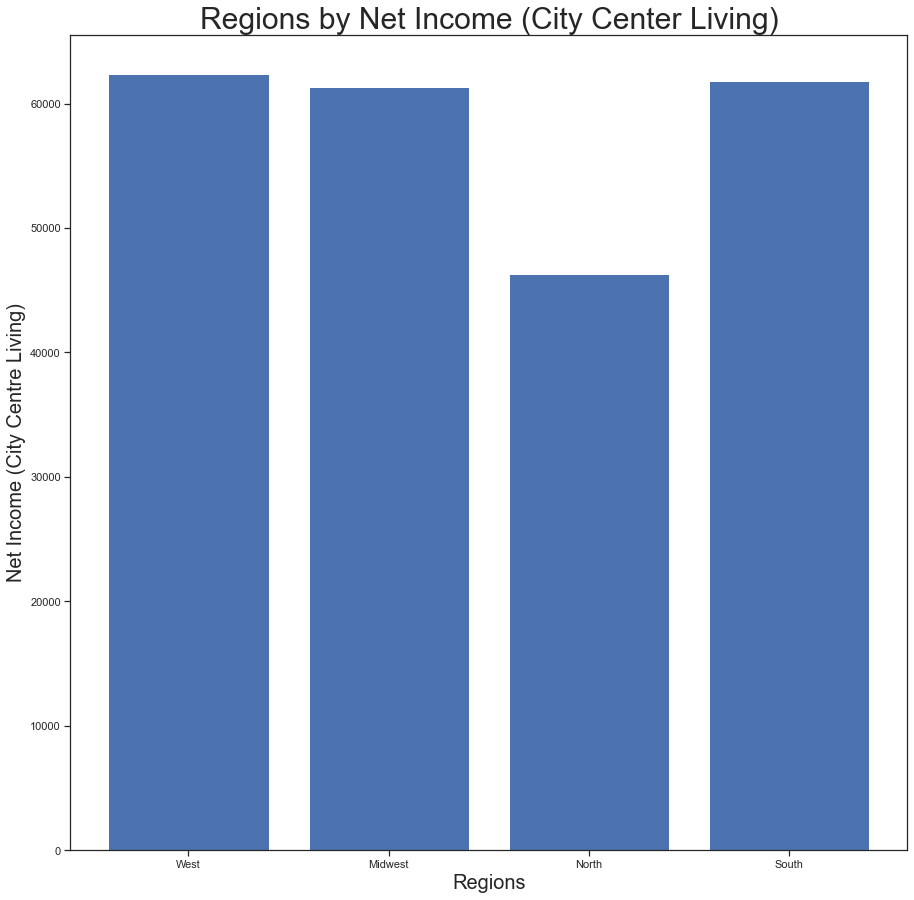

In [505]:
df.sort_values('Net Income CC',inplace=True)

plt.figure(figsize=(15,15))
plt.bar(df['Region'],df['Net Income CC'])
plt.title('Regions by Net Income (City Center Living)', size=30)
plt.ylabel('Net Income (City Centre Living)', size=20)
plt.xlabel('Regions', size=20)
plt.show()

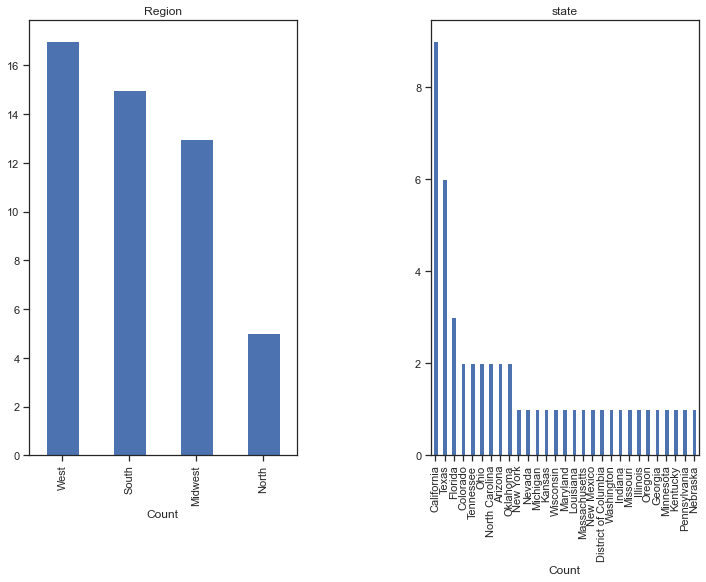

In [495]:
#Code task 13#
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.Region.value_counts().plot(kind='bar', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Region')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.State.value_counts().plot(kind='bar', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('state')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);
#You're encouraged to explore a few different figure sizes, orientations, and spacing here
# as the importance of easy-to-read and informative figures is frequently understated
# and you will find the ability to tweak figures invaluable later on

<AxesSubplot:title={'center':'Average Avocado Prices'}>

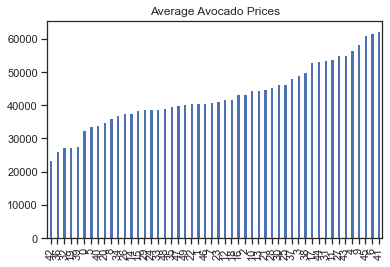

In [503]:
df['Net Income CC'].plot(kind = "bar", y = "mean", x='City', legend = False, title = "Average Avocado Prices")
